# Лабораторна робота №2

## Частина 1: Регресія на згенерованому наборі даних

### 1.1 Згенеруйте набір даних 
Згенеруйте набір даних для регресії за допомогою sklearn.datasets.make_regression (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.

In [266]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

# Генеруємо набір даних для регресії
X, y = make_regression(n_samples=1000,    # Кількість екземплярів
                       n_features=5,      # Кількість параметрів
                       n_informative=3,   # Визначає кількість інформативних параметрів в наборі даних
                       noise=17,         # Рівень шуму
                       random_state=42)

df = pd.DataFrame(data=X, columns=[f'Feature_{i+1}' for i in range(5)])
df['Target'] = y

# Зберігаємо набір даних у CSV-файл
df.to_csv('data_for_part1.csv', index=False)

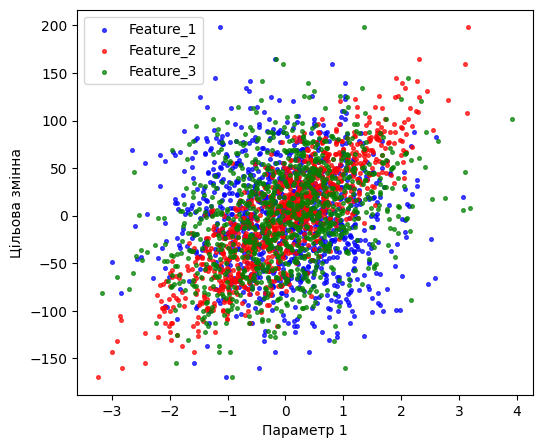

In [267]:
import matplotlib.pyplot as plt

# Створюємо графік, щоб візуалізувати згенеровані дані
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(X[:, 0], y, s=7, color='b', label='Feature_1', alpha=0.7)
plt.scatter(X[:, 1], y, s=7, color='r', label='Feature_2', alpha=0.7)
plt.scatter(X[:, 2], y, s=7, color='g', label='Feature_3', alpha=0.7)
plt.xlabel('Параметр 1')
plt.ylabel('Цільова змінна')
plt.legend()
plt.show()

# 1.2 Розподіл даних
Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.

In [268]:
# Завантаження даних
data = pd.read_csv('data_for_part1.csv')

# Перегляд перших декількох рядків даних
print("---Перегляд перших декількох рядків даних---")
print(data.head(), "\n")

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---")
print(data.info(), "\n")

# Вивести основні статистичні показники даних
print("---Основні статистичні показники даних---")
print(data.describe(), "\n")

---Перегляд перших декількох рядків даних---
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  77.812223
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708 -23.236355
2   0.651391   0.954002   0.570891  -0.315269   1.135566  60.810932
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112 -53.744184
4   1.554160   0.342338  -0.530971   0.853976  -0.335138  -0.138741 

---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Target     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB
None 

---О

In [269]:
# Розділення даних на тренувальний і тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.3 Побудуйте модель регресії 
Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

Mean Squared Error: 278.19893450733974
R-squared: 0.906798838953286


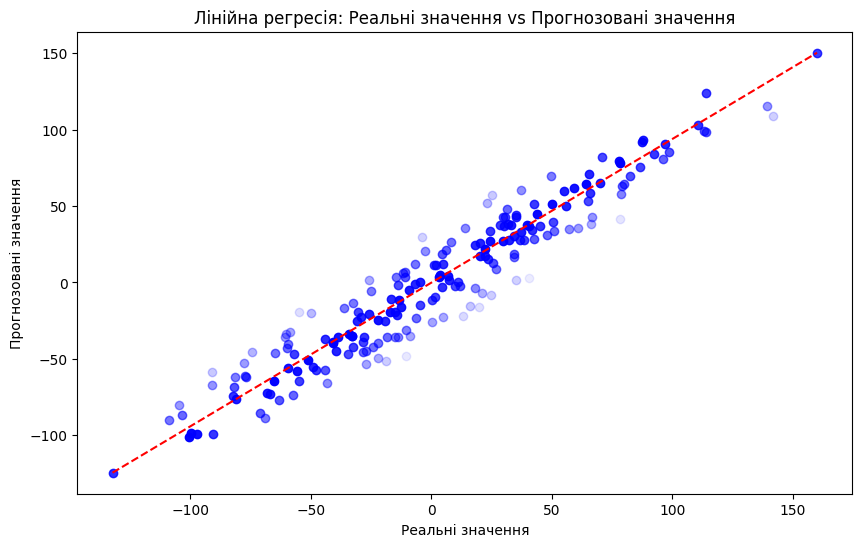

In [270]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Побудова моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Виведення результатів
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Відстань між справжніми та прогнозованими значеннями
distances = np.abs(y_test - y_pred)
# Максимальна відстань для налаштування прозорості
max_distance = np.max(distances)


# Візуалізація результатів з налаштуваною прозорістю
plt.figure(figsize=(10, 6))
for i in range(len(y_test)):
    alpha = 1 - (distances[i] / max_distance)  # Прозорість залежно від відстані
    plt.scatter(y_test[i], y_pred[i], c='b', alpha=alpha)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.xlabel("Реальні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Лінійна регресія: Реальні значення vs Прогнозовані значення")
plt.show()


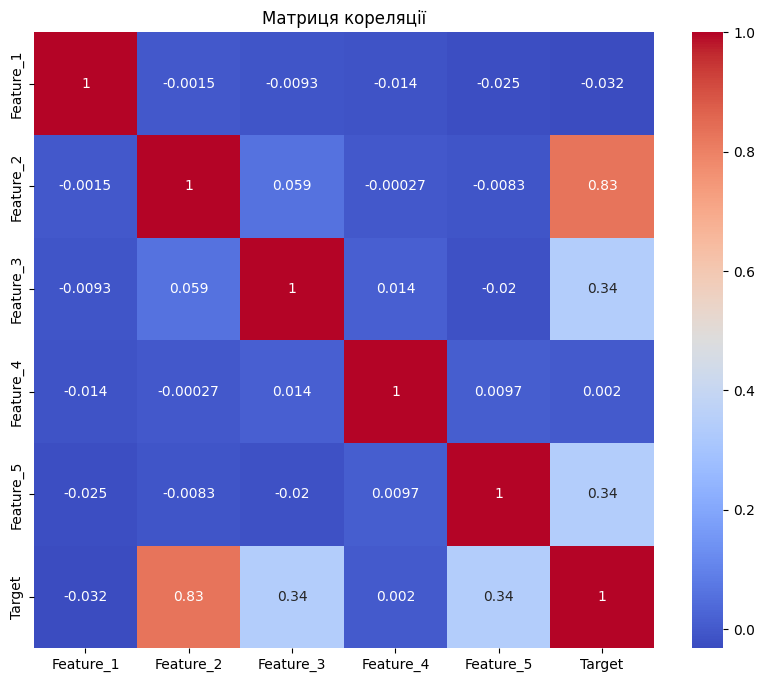

In [271]:
import seaborn as sns

# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()